In [54]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
csgo = pd.read_csv('counter-strike/playerStats.csv')

In [56]:
#Make a copy of DataFrame
csgo_new = csgo
csgo_new.head(10)

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...
5,Nuke,11915,28,21,99.8,65.5,1.35,2311133/binary-dragons-vs-alpha-binary-dragons...
6,Nuke,12802,20,17,78.2,75.9,1.20,2311133/binary-dragons-vs-alpha-binary-dragons...
7,Nuke,7590,21,24,85.6,65.5,1.03,2311133/binary-dragons-vs-alpha-binary-dragons...
8,Nuke,2982,18,20,66.6,69.0,1.00,2311133/binary-dragons-vs-alpha-binary-dragons...
9,Nuke,9903,18,20,57.5,65.5,0.87,2311133/binary-dragons-vs-alpha-binary-dragons...


In [57]:
#Transsform the Map to dummies
csgo_new = pd.get_dummies(csgo_new, columns=['Map'])

In [58]:
#Standardize
clmns = ['Map_Nuke','Map_Cobblestone','Map_Inferno','Player','Kills', 'Deaths',
         'Rating']
csgo_std = stats.zscore(csgo_new[clmns])

In [59]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(csgo_std)
labels = kmeans.labels_

In [60]:
#Glue back to originaal data
csgo_new['clusters'] = labels

In [61]:
#Add the column into our list
clmns.extend(['clusters'])
clmns

['Map_Nuke',
 'Map_Cobblestone',
 'Map_Inferno',
 'Player',
 'Kills',
 'Deaths',
 'Rating',
 'clusters']

In [62]:
#Lets analyze the clusters
print  (csgo_new[clmns].groupby(['clusters']).mean())

          Map_Nuke  Map_Cobblestone  Map_Inferno       Player      Kills  \
clusters                                                                   
0         0.058894         0.154442     0.087589  7920.491749  22.123772   
1         0.059532         0.144829     0.096392  8460.732762  13.886430   

             Deaths    Rating  
clusters                       
0         15.819168  1.357791  
1         19.437790  0.805860  


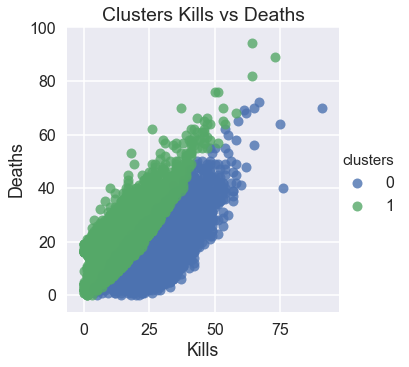

In [63]:
%matplotlib inline
#Scatter plot of Kills and Death
sns.lmplot('Kills', 'Deaths', 
           data=csgo_new, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Kills vs Deaths')
plt.xlabel('Kills')
plt.ylabel('Deaths')

In [65]:
X = csgo_new[['Player','Deaths', 'Rating']]
y = csgo_new['Kills']

In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn import cross_validation
#from sklearn.model_selection import 
from sklearn.model_selection import KMeans
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train,y_test =  cross_validation.train_test_split(X,y,test_size=0.50,random_state=70)

C:\Users\Pornima\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [117]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [118]:
#Predict Output
predicted= kmeans.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 1, 0])

In [119]:
kmeans.score(X,y)

-849523891255.4408

In [120]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted)

0.00020997742742655164

In [109]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train)
print(k_means.labels_[:])
print(y_train[:])

score = accuracy_score(y_test,k_means.predict(X_test))
print('Accuracy:{0:f}'.format(score))

k_means.predict(X_test)
print(k_means.labels_[:])
print(y_test[:])

[1 0 0 ..., 1 1 1]
122963    13
7562      10
152574    28
97552     16
203896    20
90077     14
80895     26
184114    29
96179      7
11181     21
224857    17
140842    22
20651     22
23387      9
219736    19
190681    14
44034     25
60170     11
185855    11
35573     21
52939     32
41927     17
34301     19
113419    17
179189    17
69135     19
106434    21
79736     20
189437    19
122486    14
          ..
145258    11
106303     9
62986     21
177679    26
134754    12
218172     2
1685      27
212152    20
14938     10
215117    17
57641     12
19196     21
84943     21
71297     16
81748      3
210657    13
77620     27
221463    15
45024     32
198344    24
215655    23
159060    15
178805    17
202069    29
176564    28
80768     15
152635    26
156988    17
218226    12
220494    18
Name: Kills, Length: 114297, dtype: int64
Accuracy:0.000394
[1 0 0 ..., 1 1 1]
133668    23
109190    31
217501    21
4471      16
67240     12
206966    22
24201     17
61        16
13921